In [1]:
import random
import pandas as pd
from datetime import timedelta, date, datetime

# Define lists of employee names and roles
employee_names = ["John Doe", "Jane Smith", "Bob Johnson", "Emily Davis", "Tom Wilson",
                  "Sara Brown", "Mike Lee", "Kim White", "Dave Jones", "Amy Taylor",
                  "Steve Parker", "Lisa Green", "Chris Wright", "Megan Anderson", "Alex Kim",
                  "Karen Lee", "Tim Davis", "Rachel Chen", "David Brown", "Michelle Johnson"]
employee_roles = ["Developer", "Designer", "Product Manager", "Sales Executive", "Marketing Specialist"]

# Define the date range to generate data for
start_date = date(2023, 1, 1)
end_date = date(2023, 3, 31)
delta = end_date - start_date

# Define the dataset as a list of dictionaries
dataset = []
for i in range(20):
    employee_id = i + 1
    employee_name = random.choice(employee_names)
    employee_role = random.choice(employee_roles)
    for j in range(delta.days + 1):
        current_date = start_date + timedelta(days=j)
        active_start_time = "{:02d}:{:02d}".format(random.randint(8, 9), random.randint(0, 59))
        active_screen_time = round(random.uniform(1, 6), 2)
        active_collaboration_time = round(random.uniform(1, 2), 2)
        social_time = round(random.uniform(0, 2), 2)
        total_active_time = active_screen_time + active_collaboration_time + social_time
        if total_active_time < 4:
            active_screen_time += (4 - total_active_time)
        elif total_active_time > 10:
            active_screen_time -= (total_active_time - 10)
        percentage_task_closed = random.randint(60, 100)
        rating = random.randint(1, 4)
        data = {
            "Employee ID": employee_id,
            "Employee Name": employee_name,
            "Date": current_date.strftime("%Y-%m-%d"),
            "Active Start Time": active_start_time,
            "Active Screen Time": active_screen_time,
            "Active Collaboration Time": active_collaboration_time,
            "Social Time": social_time,
            "Percentage of Task Closed": percentage_task_closed,
            "Role": employee_role,
            "Rating": rating
        }
        dataset.append(data)

In [2]:
df = pd.DataFrame(dataset)
df.head(5)

,Employee ID,Employee Name,Date,Active Start Time,Active Screen Time,Active Collaboration Time,Social Time,Percentage of Task Closed,Role,Rating
0,1,Chris Wright,2023-01-01,08:02,2.81,1.40,1.09,78,Product Manager,3
1,1,Chris Wright,2023-01-02,09:43,3.25,1.69,1.47,95,Product Manager,4
2,1,Chris Wright,2023-01-03,09:15,1.53,1.32,1.15,83,Product Manager,1
3,1,Chris Wright,2023-01-04,08:31,5.24,1.28,1.37,98,Product Manager,3
4,1,Chris Wright,2023-01-05,09:29,4.73,1.41,1.71,65,Product Manager,1


In [3]:
df = pd.DataFrame(dataset)
df.to_csv('Employee Rating.csv', index=False)

In [4]:
df = df.set_index(['Employee ID','Employee Name', 'Date'])
df.head(5)

Active Start Time  Active Screen Time  \
Employee ID Employee Name Date                                               
1           Chris Wright  2023-01-01             08:02                2.81   
                          2023-01-02             09:43                3.25   
                          2023-01-03             09:15                1.53   
                          2023-01-04             08:31                5.24   
                          2023-01-05             09:29                4.73   

                                      Active Collaboration Time  Social Time  \
Employee ID Employee Name Date                                                 
1           Chris Wright  2023-01-01                       1.40         1.09   
                          2023-01-02                       1.69         1.47   
                          2023-01-03                       1.32         1.15   
                          2023-01-04                       1.28         1.37   
                          2023-01-05                       1.41         1.71   

                                      Percentage of Task Closed  \
Employee ID Employee Name Date                                    
1           Chris Wright  2023-01-01                         78   
                          2023-01-02                         95   
                          2023-01-03                         83   
                          2023-01-04                         98   
                          2023-01-05                         65   

                                                 Role  Rating  
Employee ID Employee Name Date                                 
1           Chris Wright  2023-01-01  Product Manager       3  
                          2023-01-02  Product Manager       4  
                          2023-01-03  Product Manager       1  
                          2023-01-04  Product Manager       3  
                          2023-01-05  Product Manager       1

In [5]:
# convert all the categorical columns in the dataset to numerical values
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def label_encode(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    return df


In [6]:
df = label_encode(df)

In [7]:
df.head()

Active Start Time  Active Screen Time  \
Employee ID Employee Name Date                                                
1           Chris Wright  2023-01-01                  2                2.81   
                          2023-01-02                103                3.25   
                          2023-01-03                 75                1.53   
                          2023-01-04                 31                5.24   
                          2023-01-05                 89                4.73   

                                      Active Collaboration Time  Social Time  \
Employee ID Employee Name Date                                                 
1           Chris Wright  2023-01-01                       1.40         1.09   
                          2023-01-02                       1.69         1.47   
                          2023-01-03                       1.32         1.15   
                          2023-01-04                       1.28         1.37   
                          2023-01-05                       1.41         1.71   

                                      Percentage of Task Closed  Role  Rating  
Employee ID Employee Name Date                                                 
1           Chris Wright  2023-01-01                         78     3       3  
                          2023-01-02                         95     3       4  
                          2023-01-03                         83     3       1  
                          2023-01-04                         98     3       3  
                          2023-01-05                         65     3       1

<Axes: >

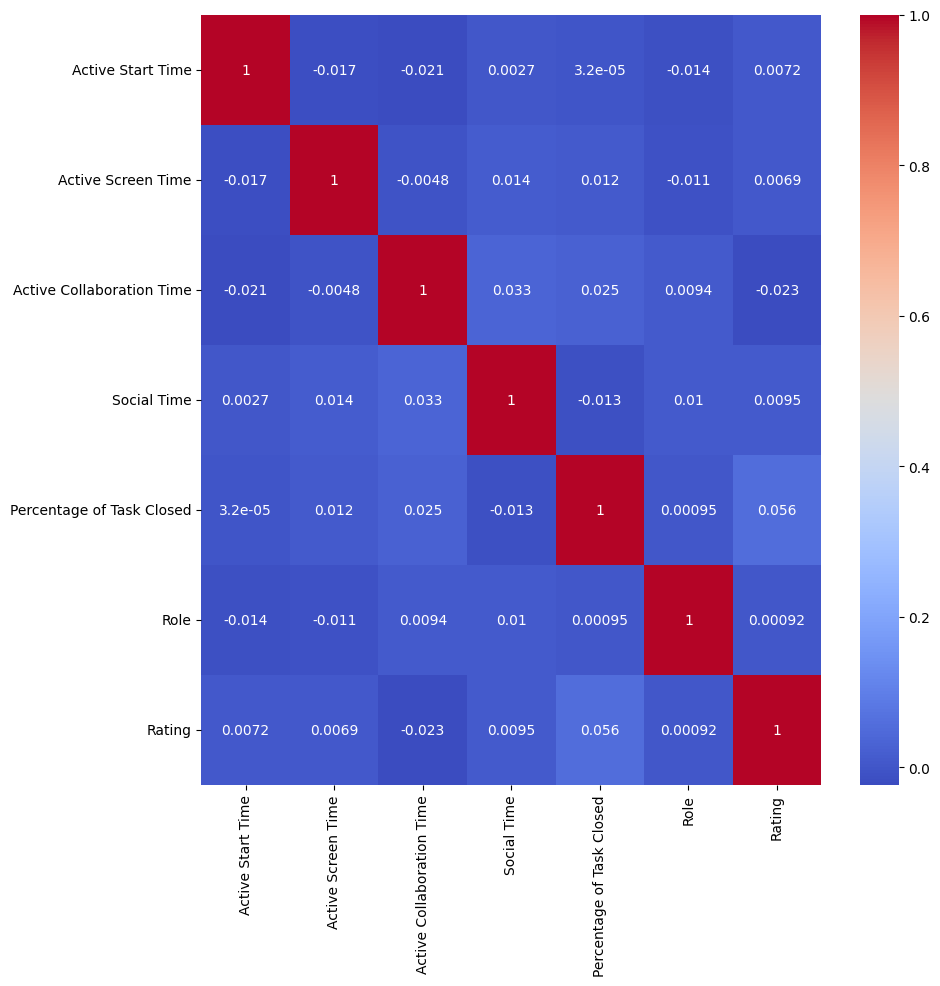

In [8]:
# use spearman correlation to find the correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# create a correlation matrix
corr = df.corr(method='spearman')
# plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [9]:
# do the train test split
from sklearn.model_selection import train_test_split
X = df.drop('Rating', axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_pred = rfc.predict(X_test)

In [12]:
# calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

In [13]:
print(round(mae, 2))

1.26


In [14]:
import joblib
joblib.dump(rfc, 'RandomForest.joblib')

['RandomForest.joblib']

In [15]:
X_features = list( df.columns )
X_features.remove( "Rating" )

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split( df[X_features],
                                    df.Rating,
                                    test_size = 0.3,
                                    random_state = 100 )

In [17]:
import warnings
warnings.filterwarnings("ignore")
import eli5.sklearn
eli5.explain_weights( 
    rfc, 
    feature_names = X_features )

Weight,Feature
0.2019 ± 0.0320,Active Screen Time
0.1925 ± 0.0351,Social Time
0.1856 ± 0.0341,Active Start Time
0.1834 ± 0.0357,Active Collaboration Time
0.1625 ± 0.0364,Percentage of Task Closed
0.0741 ± 0.0313,Role


In [18]:
eli5.show_prediction( rfc,
                         X_test.iloc[0],
                         target_names = ['Outstanding', 'Good', 'Fair', 'Poor'] )

In [19]:
eli5.show_prediction( rfc,
                         X_test.iloc[5],
                         target_names = ['Outstanding', 'Good', 'Fair', 'Poor'] )

In [20]:
eli5.show_prediction( rfc,
                         X_test.iloc[5],
                         target_names = ['Outstanding', 'Good', 'Fair', 'Poor'] )

In [21]:
eli5.show_prediction( rfc,
                         X_test.iloc[10],
                         target_names = ['Outstanding', 'Good', 'Fair', 'Poor'] )